In [ ]:
!pip install opendatasets

**IMPORTING LIBRARIES**

In [ ]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import regularizers
import tensorflow as tf


import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

**DOWNLOADING DATASE**

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jarvis2ironman
Your Kaggle Key: ··········


100%|██████████| 1.14G/1.14G [00:12<00:00, 99.0MB/s]


In [ ]:
train_path = "../content/pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/train"
test_path = "../content/pediatric-pneumonia-chest-xray/Pediatric Chest X-ray Pneumonia/test"

In [ ]:
normal_images = [img for img in os.listdir(f'{train_path}/NORMAL')]
pneumonia_images = [img for img in os.listdir(f'{train_path}/PNEUMONIA')]

In [ ]:
normal_select = np.random.choice(normal_images, 5, replace=False)
pneumonia_select = np.random.choice(pneumonia_images, 5, replace=False)

**Plotting the Images to understand difference between Noraml X-ray Images and X-Rays with Pneumonia**

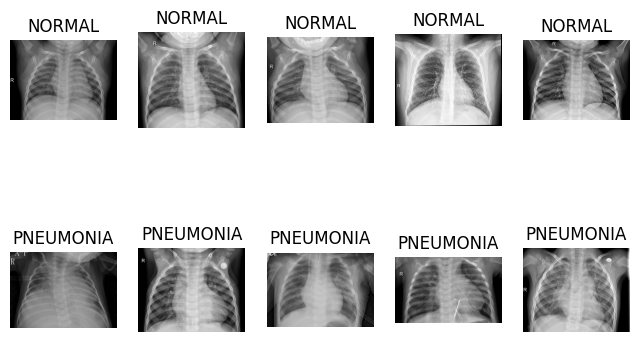

In [ ]:
#Plot the selected images
from tensorflow.keras.preprocessing import image
fig = plt.figure(figsize=(8,5))
for i in range(10):
    if i<5:
        fpath = f'{train_path}/NORMAL/{normal_select[i]}'
        label = 'NORMAL'
    else:
        fpath = f'{train_path}/PNEUMONIA/{pneumonia_select[i-5]}'
        label = 'PNEUMONIA'
    ax = fig.add_subplot(2,5,i+1)

    im = image.load_img(fpath)
    plt.imshow(im)
    plt.title(label)
    plt.axis('off')
plt.show()

DATA MODELLING & PREPROCESSING

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(180,180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(180,180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(180,180),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Function for seperating the Target Data**

In [ ]:
def Target_Data_Seperation(folder_path, target_path):
    label = []
    for path, tag in target_path:
        for filename in os.listdir(folder_path + path):
            img = cv2.imread(os.path.join(folder_path, path, filename)) # second param: 0 is b&w picture
            if img is not None:
                label.append(tag)
    return np.array(label)
